In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML/AP Research/supermarket_sales - Sheet1.csv')

# Display the first few rows of the dataset
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [13]:
# Basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [14]:
# Check for missing values
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


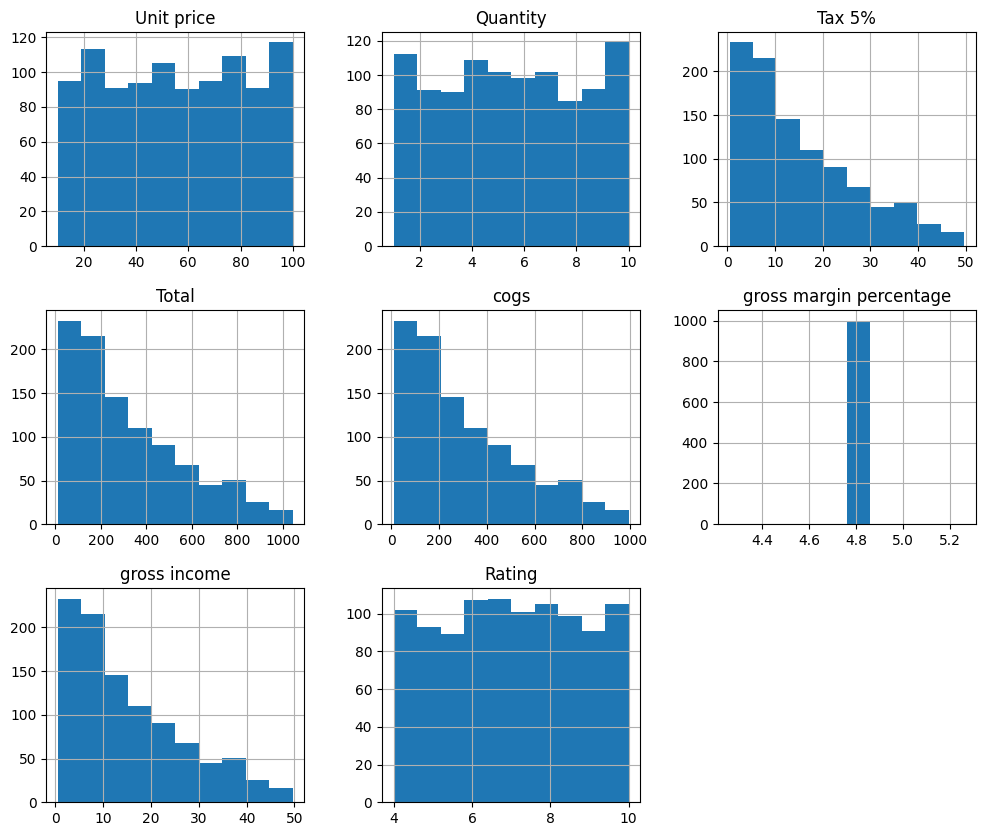

<Figure size 1000x800 with 0 Axes>

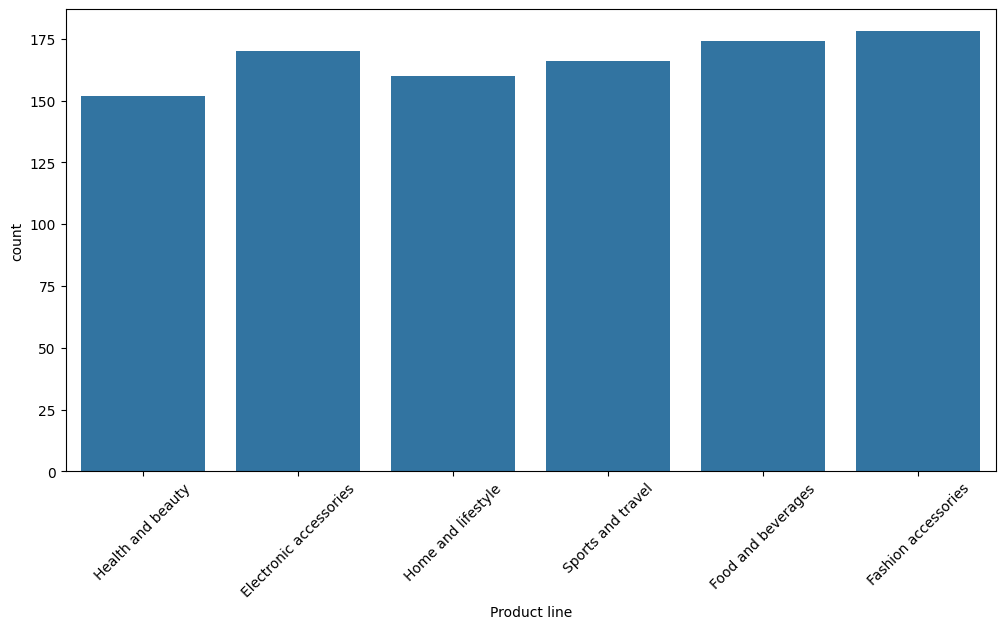

In [16]:
# Visualize the distribution of numerical features
df.hist(figsize=(12, 10))
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.show()

# Visualize the distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='Product line', data=df)
plt.xticks(rotation=45)
plt.show()

In [23]:
# Example: Convert 'Date' to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df.drop('Date', axis=1, inplace=True)



KeyError: 'Date'

In [32]:
df.head()

,Unit price,Quantity,Tax 5,Total,cogs,gross margin percentage,gross income,Rating,Year,Month,...,Time 20 48,Time 20 50,Time 20 51,Time 20 52,Time 20 54,Time 20 55,Time 20 57,Time 20 59,Payment Credit card,Payment Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,2019,1,...,False,False,False,False,False,False,False,False,False,True
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,2019,3,...,False,False,False,False,False,False,False,False,False,False
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,2019,3,...,False,False,False,False,False,False,False,False,True,False
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,2019,1,...,False,False,False,False,False,False,False,False,False,True
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,2019,2,...,False,False,False,False,False,False,False,False,False,True


In [33]:
# Clean column names by replacing special characters with underscores
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

# Alternatively, you can remove special characters entirely
# df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '', regex=True)

# Check the cleaned column names
print(df.columns)

# Example: Load the dataset (replace this with your actual dataset loading code)
# df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Clean column names (replace special characters with underscores)
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)

Index(['Unit_price', 'Quantity', 'Tax_5_', 'Total', 'cogs',
       'gross_margin_percentage', 'gross_income', 'Rating', 'Year', 'Month',
       ...
       'Time_20_48', 'Time_20_50', 'Time_20_51', 'Time_20_52', 'Time_20_54',
       'Time_20_55', 'Time_20_57', 'Time_20_59', 'Payment_Credit_card',
       'Payment_Ewallet'],
      dtype='object', length=1528)


In [34]:
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [35]:
# Define features and target variable
X = df.drop('Rating', axis=1)  # Assuming 'Rating' is the target variable
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Check the cleaned column names
print(df.columns)

# Initialize the AutoML model
automl = AutoML()

# Train the model
automl.fit(X_train, y_train, task="regression", time_budget=900, metric="rmse")

Index(['Unit_price', 'Quantity', 'Tax_5_', 'Total', 'cogs',
       'gross_margin_percentage', 'gross_income', 'Rating', 'Year', 'Month',
       ...
       'Time_20_48', 'Time_20_50', 'Time_20_51', 'Time_20_52', 'Time_20_54',
       'Time_20_55', 'Time_20_57', 'Time_20_59', 'Payment_Credit_card',
       'Payment_Ewallet'],
      dtype='object', length=1528)
[flaml.automl.logger: 03-15 15:42:54] {1728} INFO - task = regression
[flaml.automl.logger: 03-15 15:42:54] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 03-15 15:42:54] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 03-15 15:42:54] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 03-15 15:42:54] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-15 15:42:55] {2393} INFO - Estimated sufficient time budget=9786s. Estimated necessary time budget=70s.
[flaml.automl.logger: 03-15 15:42:55] {2442} INF

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 03-15 15:42:58] {2442} INFO -  at 12.3s,	estimator sgd's best error=1.7159,	best estimator lgbm's best error=1.6987
[flaml.automl.logger: 03-15 15:42:58] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 03-15 15:42:59] {2442} INFO -  at 13.3s,	estimator lgbm's best error=1.6987,	best estimator lgbm's best error=1.6987
[flaml.automl.logger: 03-15 15:42:59] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 03-15 15:42:59] {2442} INFO -  at 13.9s,	estimator lgbm's best error=1.6987,	best estimator lgbm's best error=1.6987
[flaml.automl.logger: 03-15 15:42:59] {2258} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 03-15 15:43:00] {2442} INFO -  at 14.7s,	estimator lgbm's best error=1.6987,	best estimator lgbm's best error=1.6987
[flaml.automl.logger: 03-15 15:43:00] {2258} INFO - iteration 7, current learner xgboost
[flaml.automl.logger: 03-15 15:43:07] {2442} INFO -  at 21.3s,	estimator xgboost's best error=1.70

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = automl.predict(X_test)

# Evaluate the model
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

RMSE: 1.8005347644477478
R^2: -0.056759057951922376


In [39]:
# Print the best model and its parameters
print("Best model:", automl.best_estimator)
print("Best parameters:", automl.best_config)

# Visualize the feature importance (if applicable)
if hasattr(automl.best_estimator, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=automl.best_estimator.feature_importances_, y=X.columns)
    plt.title('Feature Importance')
    plt.show()

Best model: lgbm
Best parameters: {'n_estimators': 4, 'num_leaves': 31, 'min_child_samples': 12, 'learning_rate': 0.27966980856965834, 'log_max_bin': 10, 'colsample_bytree': 0.978697656947443, 'reg_alpha': 0.0034968710369071166, 'reg_lambda': 25.85605667608343}
